# Homework 2 - Data Mining
***

## Importing Libraries

In [1]:
#import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report , confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [2]:
dataset = pd.read_csv('housePrice.csv')
dataset

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3500000000
3469,83,2,True,True,True,Niavaran,6800000000
3470,75,2,False,False,False,Parand,365000000
3471,105,2,True,True,True,Dorous,5600000000


## Info of Dataset

In [3]:
dataset.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

# Detect and Remove Missing Values 

In [4]:
#before removing missing values 
shape = dataset.shape
print('Dataset Shape:', shape)
print('Dataset Row Number:', shape[0])

Dataset Shape: (3473, 7)
Dataset Row Number: 3473


In [5]:
dataset = dataset.dropna()

In [6]:
#after removing missing values
new_shape = dataset.shape
print('Dataset New Shape:', new_shape)
print('Dataset New Row Number:', new_shape[0])

Dataset New Shape: (3450, 7)
Dataset New Row Number: 3450


# Add PriceLevel  Column

In [7]:
dataset.describe()

,Area,Room,Price
count,3450.000000,3450.000000,3.450000e+03
mean,106.917391,2.081159,5.375563e+09
std,69.550976,0.760216,8.125918e+09
min,30.000000,0.000000,3.600000e+06
25%,69.000000,2.000000,1.419250e+09
50%,90.000000,2.000000,2.900000e+09
75%,120.000000,2.000000,6.000000e+09
max,929.000000,5.000000,9.240000e+10


In [8]:
dataset['Price'].describe()

count    3.450000e+03
mean     5.375563e+09
std      8.125918e+09
min      3.600000e+06
25%      1.419250e+09
50%      2.900000e+09
75%      6.000000e+09
max      9.240000e+10
Name: Price, dtype: float64

In [9]:
dataset['priceLevel'] = pd.qcut(dataset['Price'], 4, labels=['cheap', 'underMean', 'upperMean', 'expensive'])
dataset

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,True,True,True,Shahran,1850000000,underMean
1,60,1,True,True,True,Shahran,1850000000,underMean
2,79,2,True,True,True,Pardis,550000000,cheap
3,95,2,True,True,True,Shahrake Qods,902500000,cheap
4,123,2,True,True,True,Shahrake Gharb,7000000000,expensive
...,...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3500000000,upperMean
3469,83,2,True,True,True,Niavaran,6800000000,expensive
3470,75,2,False,False,False,Parand,365000000,cheap
3471,105,2,True,True,True,Dorous,5600000000,upperMean


# Convert Categorical variables into Numerical form

In [10]:
le = LabelEncoder()

In [11]:
categ = ['Parking', 'Warehouse', 'Elevator', 'Address']
dataset[categ] = dataset[categ].apply(le.fit_transform)
dataset

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,1,1,1,156,1850000000,underMean
1,60,1,1,1,1,156,1850000000,underMean
2,79,2,1,1,1,117,550000000,cheap
3,95,2,1,1,1,152,902500000,cheap
4,123,2,1,1,1,150,7000000000,expensive
...,...,...,...,...,...,...,...,...
3468,86,2,1,1,1,163,3500000000,upperMean
3469,83,2,1,1,1,105,6800000000,expensive
3470,75,2,0,0,0,115,365000000,cheap
3471,105,2,1,1,1,39,5600000000,upperMean


In [12]:
dataset.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03
mean,106.917391,2.081159,0.847536,0.915072,0.787536,104.998841,5.375563e+09
std,69.550976,0.760216,0.359522,0.278814,0.409111,50.321575,8.125918e+09
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06
25%,69.000000,2.000000,1.000000,1.000000,1.000000,61.000000,1.419250e+09
50%,90.000000,2.000000,1.000000,1.000000,1.000000,117.000000,2.900000e+09
75%,120.000000,2.000000,1.000000,1.000000,1.000000,146.000000,6.000000e+09
max,929.000000,5.000000,1.000000,1.000000,1.000000,191.000000,9.240000e+10


# Scaling

In [13]:
columns = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price']
scaler = StandardScaler()
dataset_scaled = dataset
dataset_scaled[columns] = scaler.fit_transform(dataset_scaled[columns])
dataset_scaled

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,-0.631533,-1.422380,0.424135,0.304647,0.519406,1.013652,-0.433929,underMean
1,-0.674673,-1.422380,0.424135,0.304647,0.519406,1.013652,-0.433929,underMean
2,-0.401453,-0.106774,0.424135,0.304647,0.519406,0.238524,-0.593934,cheap
3,-0.171372,-0.106774,0.424135,0.304647,0.519406,0.934151,-0.550548,cheap
4,0.231268,-0.106774,0.424135,0.304647,0.519406,0.894401,0.199937,expensive
...,...,...,...,...,...,...,...,...
3468,-0.300793,-0.106774,0.424135,0.304647,0.519406,1.152777,-0.230846,upperMean
3469,-0.343933,-0.106774,0.424135,0.304647,0.519406,0.000023,0.175321,expensive
3470,-0.458973,-0.106774,-2.357739,-3.282491,-1.925275,0.198774,-0.616704,cheap
3471,-0.027572,-0.106774,0.424135,0.304647,0.519406,-1.311732,0.027624,upperMean


## Spliting Data to X, y

In [14]:
X = dataset_scaled.iloc[:, :6]
y = dataset_scaled['Price']

In [15]:
X

,Area,Room,Parking,Warehouse,Elevator,Address
0,-0.631533,-1.422380,0.424135,0.304647,0.519406,1.013652
1,-0.674673,-1.422380,0.424135,0.304647,0.519406,1.013652
2,-0.401453,-0.106774,0.424135,0.304647,0.519406,0.238524
3,-0.171372,-0.106774,0.424135,0.304647,0.519406,0.934151
4,0.231268,-0.106774,0.424135,0.304647,0.519406,0.894401
...,...,...,...,...,...,...
3468,-0.300793,-0.106774,0.424135,0.304647,0.519406,1.152777
3469,-0.343933,-0.106774,0.424135,0.304647,0.519406,0.000023
3470,-0.458973,-0.106774,-2.357739,-3.282491,-1.925275,0.198774
3471,-0.027572,-0.106774,0.424135,0.304647,0.519406,-1.311732


In [16]:
y

0      -0.433929
1      -0.433929
2      -0.593934
3      -0.550548
4       0.199937
          ...   
3468   -0.230846
3469    0.175321
3470   -0.616704
3471    0.027624
3472   -0.617320
Name: Price, Length: 3450, dtype: float64

## Split Dataset to Train , Test

In [17]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)

X train shape (2760, 6)
y train shape (2760,)


In [19]:
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X test shape (690, 6)
y test shape (690,)


# Model Building
***

# Regression

## 1. Linear Regession

In [20]:
model1 = LinearRegression()

In [21]:
model1.fit(X_train, y_train)
y_pred_test = model1.predict(X_test)

In [22]:
print("Test error:")
print("-"*40)
print("MSE score: ", mean_squared_error(y_test, y_pred_test))
print("r2 score:  ", r2_score(y_test, y_pred_test))
print("MAE score: ", mean_absolute_error(y_test, y_pred_test))

Test error:
----------------------------------------
MSE score:  0.5361076062092925
r2 score:   0.5322393973976471
MAE score:  0.3580180068666546


In [23]:
print("Train error:")
print("-"*40)
y_pred_train = model1.predict(X_train)
print("MSE score: ", mean_squared_error(y_train, y_pred_train))
print("r2 score:  ", r2_score(y_train, y_pred_train))
print("MAE score: ", mean_absolute_error(y_train, y_pred_train))

Train error:
----------------------------------------
MSE score:  0.44308923005012896
r2 score:   0.5398110879615355
MAE score:  0.34543307045919225


## 2. Polynomial Regession (degree = 2)

In [24]:
model2 = make_pipeline(PolynomialFeatures(2),LinearRegression())

In [25]:
model2.fit(X_train, y_train)
y_pred2_test = model2.predict(X_test)

In [26]:
print("Test error:")
print("-"*40)
print("MSE score: ", mean_squared_error(y_test, y_pred2_test))
print("r2 score:  ", r2_score(y_test, y_pred2_test))
print("MAE score: ", mean_absolute_error(y_test, y_pred2_test))

Test error:
----------------------------------------
MSE score:  0.3186953733072446
r2 score:   0.7219342942756506
MAE score:  0.2997243023779953


In [27]:
print("Train error:")
print("-"*40)
y_pred2_train = model2.predict(X_train)
print("MSE score: ", mean_squared_error(y_train, y_pred2_train))
print("r2 score:  ", r2_score(y_train, y_pred2_train))
print("MAE score: ", mean_absolute_error(y_train, y_pred2_train))

Train error:
----------------------------------------
MSE score:  0.31365873137145905
r2 score:   0.6742365633105851
MAE score:  0.29488709534519714


## 3. Polynomial Regession (degree = 3)

In [28]:
model3 = make_pipeline(PolynomialFeatures(3),LinearRegression())

In [29]:
model3.fit(X_train, y_train)
y_pred3_test = model3.predict(X_test)

In [30]:
print("Test error:")
print("-"*40)
print("MSE score: ", mean_squared_error(y_test, y_pred3_test))
print("r2 score:  ", r2_score(y_test, y_pred3_test))
print("MAE score: ", mean_absolute_error(y_test, y_pred3_test))

Test error:
----------------------------------------
MSE score:  0.31387757329113114
r2 score:   0.7261378851455684
MAE score:  0.30077806754097075


In [31]:
print("Train error:")
print("-"*40)
y_pred3_train = model3.predict(X_train)
print("MSE score: ", mean_squared_error(y_train, y_pred3_train))
print("r2 score:  ", r2_score(y_train, y_pred3_train))
print("MAE score: ", mean_absolute_error(y_train, y_pred3_train))

Train error:
----------------------------------------
MSE score:  0.23682888385049738
r2 score:   0.7540314252591648
MAE score:  0.2738585619752413


# Classification

In [32]:
dataset_scaled[['priceLevel']] = dataset_scaled[['priceLevel']].apply(le.fit_transform)
dataset_scaled

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,-0.631533,-1.422380,0.424135,0.304647,0.519406,1.013652,-0.433929,2
1,-0.674673,-1.422380,0.424135,0.304647,0.519406,1.013652,-0.433929,2
2,-0.401453,-0.106774,0.424135,0.304647,0.519406,0.238524,-0.593934,0
3,-0.171372,-0.106774,0.424135,0.304647,0.519406,0.934151,-0.550548,0
4,0.231268,-0.106774,0.424135,0.304647,0.519406,0.894401,0.199937,1
...,...,...,...,...,...,...,...,...
3468,-0.300793,-0.106774,0.424135,0.304647,0.519406,1.152777,-0.230846,3
3469,-0.343933,-0.106774,0.424135,0.304647,0.519406,0.000023,0.175321,1
3470,-0.458973,-0.106774,-2.357739,-3.282491,-1.925275,0.198774,-0.616704,0
3471,-0.027572,-0.106774,0.424135,0.304647,0.519406,-1.311732,0.027624,3


In [33]:
X = dataset_scaled.iloc[:, :6]
y = dataset_scaled['priceLevel']

In [34]:
X

,Area,Room,Parking,Warehouse,Elevator,Address
0,-0.631533,-1.422380,0.424135,0.304647,0.519406,1.013652
1,-0.674673,-1.422380,0.424135,0.304647,0.519406,1.013652
2,-0.401453,-0.106774,0.424135,0.304647,0.519406,0.238524
3,-0.171372,-0.106774,0.424135,0.304647,0.519406,0.934151
4,0.231268,-0.106774,0.424135,0.304647,0.519406,0.894401
...,...,...,...,...,...,...
3468,-0.300793,-0.106774,0.424135,0.304647,0.519406,1.152777
3469,-0.343933,-0.106774,0.424135,0.304647,0.519406,0.000023
3470,-0.458973,-0.106774,-2.357739,-3.282491,-1.925275,0.198774
3471,-0.027572,-0.106774,0.424135,0.304647,0.519406,-1.311732


In [35]:
y

0       2
1       2
2       0
3       0
4       1
       ..
3468    3
3469    1
3470    0
3471    3
3472    0
Name: priceLevel, Length: 3450, dtype: int64

In [36]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1.Decision Tree

In [37]:
model_tree = DecisionTreeClassifier(criterion = 'entropy')

In [38]:
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

In [39]:
print(classification_report(y_test , y_pred))
print("-" * 50)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       164
           1       0.86      0.88      0.87       185
           2       0.70      0.69      0.69       170
           3       0.72      0.68      0.70       171

    accuracy                           0.77       690
   macro avg       0.76      0.76      0.76       690
weighted avg       0.77      0.77      0.77       690

--------------------------------------------------


## 2. Random Forest

In [40]:
model_rf = RandomForestClassifier(criterion = 'entropy')

In [41]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [42]:
print(classification_report(y_test , y_pred_rf))
print("-" * 50)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       164
           1       0.84      0.85      0.85       185
           2       0.66      0.66      0.66       170
           3       0.65      0.63      0.64       171

    accuracy                           0.73       690
   macro avg       0.73      0.73      0.73       690
weighted avg       0.73      0.73      0.73       690

--------------------------------------------------


## 3. KNN

In [43]:
for i in range (3 , 6):
    print("k = ", i)
    print("-" * 55)
    model_knn = KNeighborsClassifier(n_neighbors  = i)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    print(classification_report(y_test , y_pred_knn))
    print("-" * 55)

k =  3
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       164
           1       0.78      0.77      0.78       185
           2       0.67      0.69      0.68       170
           3       0.65      0.59      0.62       171

    accuracy                           0.70       690
   macro avg       0.69      0.70      0.69       690
weighted avg       0.70      0.70      0.70       690

-------------------------------------------------------
k =  4
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       164
           1       0.78      0.85      0.81       185
           2       0.70      0.69      0.70       170
           3       0.71      0.57      0.63       171

    accuracy                           0.73       690
   macro avg       0.72      0.73      0.72       690
wei

## 4. SVM

In [44]:
kernels = {'SVC_linear':'linear','SVC_poly':'poly', 'SVC_rbf:': 'rbf'}

In [45]:
def SVM_fit_score(kernels,  X_train, X_test, y_train, y_test):

    for i, kernel in kernels.items():
        
        print('kernel: ', kernel)
        print('-'*55)
        print("Test Score:")
        svc = SVC(kernel=kernel).fit(X_train, y_train)
        y_pred_svm = svc.predict(X_test)
        
        print(classification_report(y_test , y_pred_svm))
        print('-'*55)
        print("Train Score:")
        y_pred_svm = svc.predict(X_train)
        
        print(classification_report(y_train , y_pred_svm))
        print('='*55)
        

In [46]:
SVM_fit_score(kernels, X_train, X_test, y_train, y_test)

kernel:  linear
-------------------------------------------------------
Test Score:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       164
           1       0.77      0.68      0.72       185
           2       0.57      0.66      0.62       170
           3       0.46      0.62      0.53       171

    accuracy                           0.60       690
   macro avg       0.62      0.59      0.59       690
weighted avg       0.62      0.60      0.60       690

-------------------------------------------------------
Train Score:
              precision    recall  f1-score   support

           0       0.73      0.44      0.55       699
           1       0.75      0.68      0.71       670
           2       0.58      0.65      0.61       700
           3       0.45      0.61      0.52       691

    accuracy                           0.59      2760
   macro avg       0.63      0.60      0.60      2760
weighted avg       0.62      0.5

# Neural Network

In [47]:
X

,Area,Room,Parking,Warehouse,Elevator,Address
0,-0.631533,-1.422380,0.424135,0.304647,0.519406,1.013652
1,-0.674673,-1.422380,0.424135,0.304647,0.519406,1.013652
2,-0.401453,-0.106774,0.424135,0.304647,0.519406,0.238524
3,-0.171372,-0.106774,0.424135,0.304647,0.519406,0.934151
4,0.231268,-0.106774,0.424135,0.304647,0.519406,0.894401
...,...,...,...,...,...,...
3468,-0.300793,-0.106774,0.424135,0.304647,0.519406,1.152777
3469,-0.343933,-0.106774,0.424135,0.304647,0.519406,0.000023
3470,-0.458973,-0.106774,-2.357739,-3.282491,-1.925275,0.198774
3471,-0.027572,-0.106774,0.424135,0.304647,0.519406,-1.311732


In [48]:
y

0       2
1       2
2       0
3       0
4       1
       ..
3468    3
3469    1
3470    0
3471    3
3472    0
Name: priceLevel, Length: 3450, dtype: int64

In [49]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Create Model

## Model 1:

In [51]:
model = Sequential()

# input layer
model.add(Dense(6,activation='relu'))

# hidden layers
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))

# output layer
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ["categorical_accuracy", "Precision"])

#fit Model
model.fit(x=X_train, y = y_train, validation_data=(X_test,y_test), batch_size=64,epochs=20)
model.summary()

Epoch 1/20
44/44 [==============================] - 2s 18ms/step - loss: 1.3471 - categorical_accuracy: 0.3337 - precision: 0.6667 - val_loss: 1.3363 - val_categorical_accuracy: 0.3333 - val_precision: 0.7143
Epoch 2/20
44/44 [==============================] - 0s 3ms/step - loss: 1.3123 - categorical_accuracy: 0.3699 - precision: 0.7157 - val_loss: 1.3109 - val_categorical_accuracy: 0.3580 - val_precision: 0.7544
Epoch 3/20
44/44 [==============================] - 0s 3ms/step - loss: 1.2844 - categorical_accuracy: 0.3888 - precision: 0.7436 - val_loss: 1.2911 - val_categorical_accuracy: 0.3667 - val_precision: 0.7500
Epoch 4/20
44/44 [==============================] - 0s 3ms/step - loss: 1.2618 - categorical_accuracy: 0.3989 - precision: 0.7413 - val_loss: 1.2728 - val_categorical_accuracy: 0.3783 - val_precision: 0.7174
Epoch 5/20
44/44 [==============================] - 0s 3ms/step - loss: 1.2416 - categorical_accuracy: 0.4159 - precision: 0.7384 - val_loss: 1.2554 - val_categorical_

## Model 2:

In [52]:
model2 = Sequential()

# input layer
model2.add(Dense(16,activation='relu'))

# hidden layers
model2.add(Dense(16,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(16,activation='relu'))

# output layer
model2.add(Dense(4, activation='softmax'))

#Compile model
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics =["categorical_accuracy", "Precision"])

#fit Model
model2.fit(x=X_train, y = y_train, validation_data=(X_test,y_test), batch_size=64,epochs=20)
model2.summary()

Epoch 1/20
44/44 [==============================] - 1s 7ms/step - loss: 1.3781 - categorical_accuracy: 0.2500 - precision: 0.2857 - val_loss: 1.3425 - val_categorical_accuracy: 0.4043 - val_precision: 0.6000
Epoch 2/20
44/44 [==============================] - 0s 4ms/step - loss: 1.3050 - categorical_accuracy: 0.4844 - precision: 0.7956 - val_loss: 1.2573 - val_categorical_accuracy: 0.5319 - val_precision: 0.7429
Epoch 3/20
44/44 [==============================] - 0s 5ms/step - loss: 1.1873 - categorical_accuracy: 0.5091 - precision: 0.7614 - val_loss: 1.1242 - val_categorical_accuracy: 0.5246 - val_precision: 0.7613
Epoch 4/20
44/44 [==============================] - 0s 4ms/step - loss: 1.0855 - categorical_accuracy: 0.5185 - precision: 0.7340 - val_loss: 1.0523 - val_categorical_accuracy: 0.5377 - val_precision: 0.7266
Epoch 5/20
44/44 [==============================] - 0s 5ms/step - loss: 1.0227 - categorical_accuracy: 0.5728 - precision: 0.7317 - val_loss: 1.0025 - val_categorical_a

## Model 3:

In [53]:
model3 = Sequential()

# input layer
model3.add(Dense(6,activation='relu'))

# hidden layers
model3.add(Dense(16,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(128,activation='relu'))

# output layer
model3.add(Dense(4, activation='softmax'))

#Compile model
model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics =["categorical_accuracy", "Precision"])

#fit Model
model3.fit(x=X_train, y = y_train, validation_data=(X_test,y_test), batch_size=32,epochs=20)
model3.summary()

Epoch 1/20
87/87 [==============================] - 3s 15ms/step - loss: 1.1502 - categorical_accuracy: 0.4899 - precision: 0.7781 - val_loss: 1.0433 - val_categorical_accuracy: 0.5797 - val_precision: 0.7554
Epoch 2/20
87/87 [==============================] - 0s 5ms/step - loss: 0.9952 - categorical_accuracy: 0.5775 - precision: 0.7198 - val_loss: 0.9950 - val_categorical_accuracy: 0.6000 - val_precision: 0.7322
Epoch 3/20
87/87 [==============================] - 0s 5ms/step - loss: 0.9693 - categorical_accuracy: 0.6051 - precision: 0.7275 - val_loss: 0.9617 - val_categorical_accuracy: 0.5870 - val_precision: 0.7423
Epoch 4/20
87/87 [==============================] - 0s 4ms/step - loss: 0.9565 - categorical_accuracy: 0.6047 - precision: 0.7160 - val_loss: 0.9671 - val_categorical_accuracy: 0.5928 - val_precision: 0.7051
Epoch 5/20
87/87 [==============================] - 0s 6ms/step - loss: 0.9434 - categorical_accuracy: 0.6022 - precision: 0.7196 - val_loss: 0.9606 - val_categorical_

## Model 4:

In [54]:
model4 = Sequential()

# input layer
model4.add(Dense(64,activation='relu'))

# hidden layers
model4.add(Dense(128,activation='relu'))
model4.add(Dense(256,activation='relu'))
model4.add(Dense(256,activation='relu'))

# output layer
model4.add(Dense(4, activation='softmax'))

#Compile model
model4.compile(optimizer='adam',loss='categorical_crossentropy', metrics =["categorical_accuracy", "Precision"])

#fit Model
model4.fit(x=X_train, y = y_train, validation_data=(X_test,y_test), batch_size=32,epochs=20)
model4.summary()

Epoch 1/20
87/87 [==============================] - 4s 23ms/step - loss: 1.0250 - categorical_accuracy: 0.5667 - precision: 0.6953 - val_loss: 0.9341 - val_categorical_accuracy: 0.6101 - val_precision: 0.7432
Epoch 2/20
87/87 [==============================] - 1s 8ms/step - loss: 0.9196 - categorical_accuracy: 0.6170 - precision: 0.7110 - val_loss: 0.9594 - val_categorical_accuracy: 0.6058 - val_precision: 0.6838
Epoch 3/20
87/87 [==============================] - 1s 9ms/step - loss: 0.8838 - categorical_accuracy: 0.6304 - precision: 0.7144 - val_loss: 0.8928 - val_categorical_accuracy: 0.6246 - val_precision: 0.7090
Epoch 4/20
87/87 [==============================] - 1s 7ms/step - loss: 0.8697 - categorical_accuracy: 0.6406 - precision: 0.7106 - val_loss: 0.8842 - val_categorical_accuracy: 0.6522 - val_precision: 0.7340
Epoch 5/20
87/87 [==============================] - 1s 7ms/step - loss: 0.8581 - categorical_accuracy: 0.6504 - precision: 0.7131 - val_loss: 0.8759 - val_categorical_

## Model 5(final):

In [55]:
model5 = Sequential()

# input layer
model5.add(Dense(64,activation='relu'))

# hidden layers
model5.add(Dense(256,activation='relu'))
model5.add(Dense(256,activation='relu'))
model5.add(Dense(256,activation='relu'))
model5.add(Dense(256,activation='relu'))
model5.add(Dense(256,activation='relu'))
model5.add(Dense(256,activation='relu'))

# output layer
model5.add(Dense(4, activation='softmax'))

#Compile model
model5.compile(optimizer='adam',loss='categorical_crossentropy', metrics =["categorical_accuracy", "Precision"])

#fit Model
model5.fit(x=X_train, y = y_train, validation_data=(X_test,y_test), batch_size=32,epochs=20)
model5.summary()

Epoch 1/20
87/87 [==============================] - 3s 13ms/step - loss: 1.0569 - categorical_accuracy: 0.5489 - precision: 0.6775 - val_loss: 0.9437 - val_categorical_accuracy: 0.5638 - val_precision: 0.7341
Epoch 2/20
87/87 [==============================] - 1s 8ms/step - loss: 0.9206 - categorical_accuracy: 0.6170 - precision: 0.7159 - val_loss: 0.9059 - val_categorical_accuracy: 0.6362 - val_precision: 0.7191
Epoch 3/20
87/87 [==============================] - 1s 8ms/step - loss: 0.9062 - categorical_accuracy: 0.6120 - precision: 0.6998 - val_loss: 0.9148 - val_categorical_accuracy: 0.6087 - val_precision: 0.7015
Epoch 4/20
87/87 [==============================] - 1s 8ms/step - loss: 0.8895 - categorical_accuracy: 0.6192 - precision: 0.7003 - val_loss: 0.8907 - val_categorical_accuracy: 0.6275 - val_precision: 0.7059
Epoch 5/20
87/87 [==============================] - 1s 8ms/step - loss: 0.8631 - categorical_accuracy: 0.6391 - precision: 0.7028 - val_loss: 0.8465 - val_categorical_

## Evaluate Models

In [56]:
# Evaluate model1
print("Test Score:")
print("-"*40)
test_loss, test_accuracy, test_precision = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Loss:', test_loss)

print("Train Score:")
print("-"*40)
train_loss, train_accuracy, train_precision = model.evaluate(X_train, y_train)
print('Train Accuracy:', train_accuracy)
print('Train Precision:', train_precision)
print('Train Loss:', train_loss)

Test Score:
----------------------------------------
22/22 [==============================] - 0s 1ms/step - loss: 1.0311 - categorical_accuracy: 0.6014 - precision: 0.7024
Test Accuracy: 0.6014492511749268
Test Precision: 0.7023809552192688
Test Loss: 1.031142234802246
Train Score:
----------------------------------------
87/87 [==============================] - 0s 1ms/step - loss: 1.0233 - categorical_accuracy: 0.5989 - precision: 0.6914
Train Accuracy: 0.5989130139350891
Train Precision: 0.6914212703704834
Train Loss: 1.0233279466629028


In [57]:
# Evaluate the model
print("Test Score:")
print("-"*40)
test_loss, test_accuracy, test_precision = model2.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Loss:', test_loss)

print("Train Score:")
print("-"*40)
train_loss, train_accuracy, train_precision = model3.evaluate(X_train, y_train)
print('Train Accuracy:', train_accuracy)
print('Train Precision:', train_precision)
print('Train Loss:', train_loss)

Test Score:
----------------------------------------
22/22 [==============================] - 0s 1ms/step - loss: 0.8606 - categorical_accuracy: 0.6551 - precision: 0.7191
Test Accuracy: 0.6550724506378174
Test Precision: 0.7191234827041626
Test Loss: 0.860634982585907
Train Score:
----------------------------------------
87/87 [==============================] - 0s 1ms/step - loss: 0.8554 - categorical_accuracy: 0.6417 - precision: 0.7299
Train Accuracy: 0.6416666507720947
Train Precision: 0.7299196720123291
Train Loss: 0.8553969264030457


In [58]:
# Evaluate the model
print("Test Score:")
print("-"*40)
test_loss, test_accuracy, test_precision = model4.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Loss:', test_loss)

print("Train Score:")
print("-"*40)
train_loss, train_accuracy, train_precision = model4.evaluate(X_train, y_train)
print('Train Accuracy:', train_accuracy)
print('Train Precision:', train_precision)
print('Train Loss:', train_loss)

Test Score:
----------------------------------------
22/22 [==============================] - 0s 2ms/step - loss: 0.8112 - categorical_accuracy: 0.6913 - precision: 0.7301
Test Accuracy: 0.6913043260574341
Test Precision: 0.7300509214401245
Test Loss: 0.8111751675605774
Train Score:
----------------------------------------
87/87 [==============================] - 0s 1ms/step - loss: 0.7001 - categorical_accuracy: 0.7163 - precision: 0.7628
Train Accuracy: 0.716304361820221
Train Precision: 0.7628341317176819
Train Loss: 0.7001315355300903


In [59]:
# Evaluate the model
print("Test Score:")
print("-"*40)
test_loss, test_accuracy, test_precision = model5.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Loss:', test_loss)

print("Train Score:")
print("-"*40)
train_loss, train_accuracy, train_precision = model5.evaluate(X_train, y_train)
print('Train Accuracy:', train_accuracy)
print('Train Precision:', train_precision)
print('Train Loss:', train_loss)

Test Score:
----------------------------------------
22/22 [==============================] - 0s 3ms/step - loss: 0.8372 - categorical_accuracy: 0.6580 - precision: 0.7202
Test Accuracy: 0.6579710245132446
Test Precision: 0.7202072739601135
Test Loss: 0.8371502161026001
Train Score:
----------------------------------------
87/87 [==============================] - 0s 3ms/step - loss: 0.7441 - categorical_accuracy: 0.7054 - precision: 0.7512
Train Accuracy: 0.7054347991943359
Train Precision: 0.7511879205703735
Train Loss: 0.7441495656967163


# Confusion Matrix

22/22 [==============================] - 0s 2ms/step


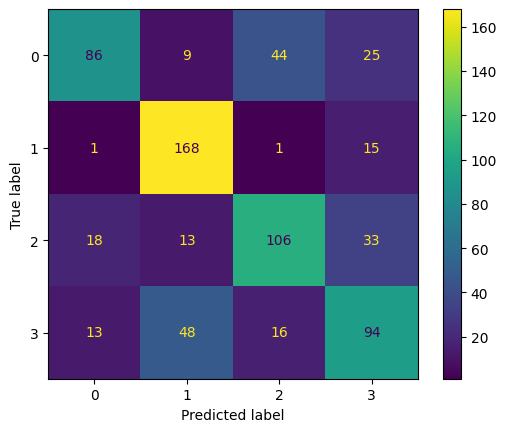

In [60]:
predictions = model5.predict(X_test)
labels = tf.argmax(predictions, axis=1).numpy()
y_true_int = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_int, labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

87/87 [==============================] - 0s 3ms/step


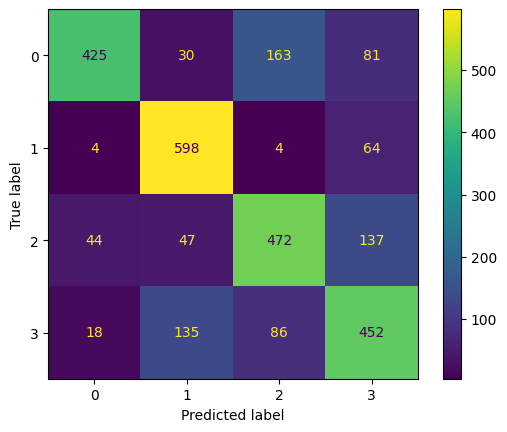

In [61]:
predictions = model5.predict(X_train)
labels = tf.argmax(predictions, axis=1).numpy()
y_true_int = np.argmax(y_train, axis=1)
cm = confusion_matrix(y_true_int, labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()